Use MotionClip env

In [1]:
import numpy as np
import torch
import joblib
import matplotlib.pyplot as plt

In [2]:
# data = joblib.load("MotionCLIP/data/amass_db/amass_30fps_train.pt")
data = joblib.load("MotionCLIP/data/amass_db/amass_30fps_test.pt")
len(data["joints3d"])

95

In [3]:
data.keys()

dict_keys(['vid_names', 'thetas', 'joints3d', 'clip_images', 'clip_pathes', 'text_raw_labels', 'text_proc_labels', 'action_cat'])

In [4]:
print(data["vid_names"][0][:1], len(data["vid_names"][0]))
print(data["thetas"][0].shape)
print(data["joints3d"][0].shape)
print(data["clip_images"][0].shape)
print(data["clip_pathes"][0])
print(data["text_raw_labels"][0][::100])
print(data["text_proc_labels"][0][::100])
print(len(data["action_cat"][0]))

['Transitions_mocap_mazen_c3d_walksideways_kick_poses'] 183
(183, 72)
(183, 18, 3)
(2, 224, 224, 3)
['./data/render/Transitions_mocap_mazen_c3d_walksideways_kick_poses_frame50.png'
 './data/render/Transitions_mocap_mazen_c3d_walksideways_kick_poses_frame150.png']
['t-pose' 'walk to the right']
['tpose' 'walk to the right']
730


In [5]:
index_to_joint = {
    0: 'pelvis',
     1: 'left_hip',
     2: 'right_hip',
     3: 'spine1',
     4: 'left_knee',
     5: 'right_knee',
     6: 'spine2',
     7: 'left_ankle',
     8: 'right_ankle',
     9: 'spine3',
    10: 'left_foot',
    11: 'right_foot',
    12: 'neck',
    13: 'left_collar',
    14: 'right_collar',
    15: 'head',
    16: 'left_shoulder',
    17: 'right_shoulder',
    18: 'left_elbow',
    19: 'right_elbow',
    20: 'left_wrist',
    21: 'right_wrist',
    22: 'left_index1',
    23: 'left_index2',
    24: 'left_index3',
    25: 'left_middle1',
    26: 'left_middle2',
    27: 'left_middle3',
    28: 'left_pinky1',
    29: 'left_pinky2',
    30: 'left_pinky3',
    31: 'left_ring1',
    32: 'left_ring2',
    33: 'left_ring3',
    34: 'left_thumb1',
    35: 'left_thumb2',
    36: 'left_thumb3',
    37: 'right_index1',
    38: 'right_index2',
    39: 'right_index3',
    40: 'right_middle1',
    41: 'right_middle2',
    42: 'right_middle3',
    43: 'right_pinky1',
    44: 'right_pinky2',
    45: 'right_pinky3',
    46: 'right_ring1',
    47: 'right_ring2',
    48: 'right_ring3',
    49: 'right_thumb1',
    50: 'right_thumb2',
    51: 'right_thumb3'
    }

In [6]:
# found in MotionCLIP codes
joints = [ 8, 1, 2, 3, 4, 5, 6, 7, 0, 9, 10, 11, 12, 13, 14, 21, 24, 38 ]

joints = [index_to_joint[j] for j in joints]
print(joints)
joints_to_index = {j:i for i, j in enumerate(joints)}
print(joints_to_index)

['right_ankle', 'left_hip', 'right_hip', 'spine1', 'left_knee', 'right_knee', 'spine2', 'left_ankle', 'pelvis', 'spine3', 'left_foot', 'right_foot', 'neck', 'left_collar', 'right_collar', 'right_wrist', 'left_index3', 'right_index2']
{'right_ankle': 0, 'left_hip': 1, 'right_hip': 2, 'spine1': 3, 'left_knee': 4, 'right_knee': 5, 'spine2': 6, 'left_ankle': 7, 'pelvis': 8, 'spine3': 9, 'left_foot': 10, 'right_foot': 11, 'neck': 12, 'left_collar': 13, 'right_collar': 14, 'right_wrist': 15, 'left_index3': 16, 'right_index2': 17}


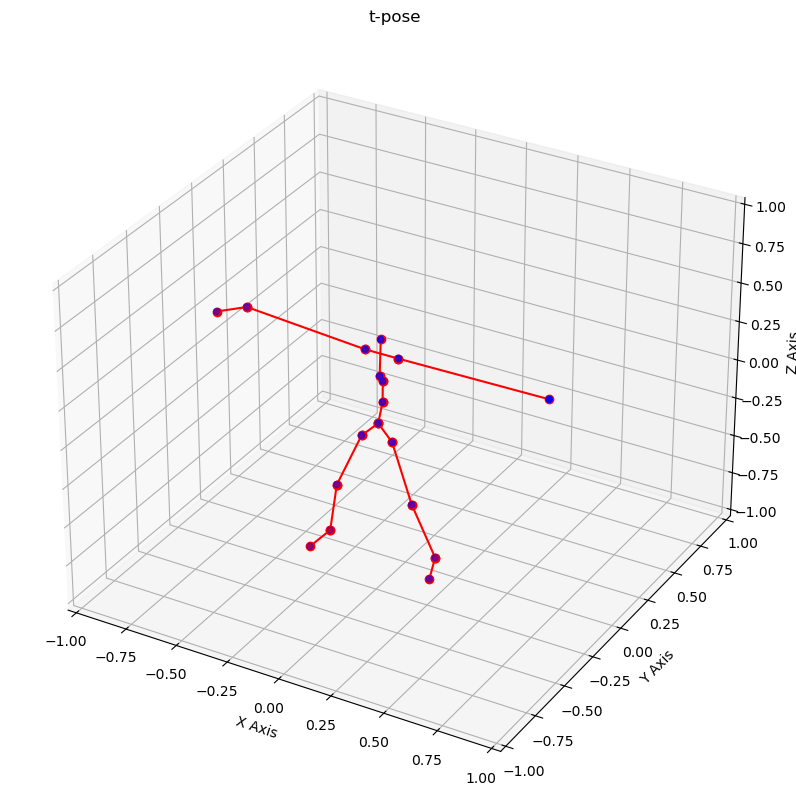

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
data_index=0

def update(frame_idx):
    ax.cla()

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

    points = data["joints3d"][data_index][frame_idx]
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    ax.scatter(x, y, z, c='b', marker='o')  # Scatter plot for the points

    for v in [
        ('pelvis', 'left_hip'), ('pelvis', 'right_hip'),
        ('left_hip', 'left_knee'), ('right_hip', 'right_knee'),
        ('left_knee', 'left_ankle'), ('right_knee', 'right_ankle'),
        ('left_ankle', 'left_foot'), ('right_ankle', 'right_foot'),
        ('pelvis', 'spine1'),
        ('spine1', 'spine2'),
        ('spine2', 'spine3'),
        ('spine3', 'neck'),
        ('left_collar', 'right_collar'),
        ('right_collar', 'right_wrist'),
        ('right_wrist', 'right_index2'),
        ('left_collar', 'left_index3')
    ]:
        vec = [joints_to_index[j] for j in v]

        ax.plot(xs=x[vec], ys=y[vec], zs=z[vec], c='r', linestyle='-', marker='o')  # Line plot connecting the points


    # Set labels for the axes
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')

    # Set the title
    ax.set_title(data["text_raw_labels"][data_index][frame_idx])

    # Show the plot
    plt.draw()# 


fps = 30
ani = FuncAnimation(fig, update, frames=len(data["joints3d"][data_index]), interval=1000/fps, repeat=False)

ani.save('output/1.amass_sample_data_joint3D_visualization.mp4', writer='ffmpeg', fps=fps, dpi=80)

plt.show()